In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
import pandas as pd

In [2]:
H_Nlogprob=[]
H_Flogprob=[]
T_Nlogprob=[]
T_Flogprob=[]
R_Nlogprob=[]
R_Flogprob=[]

In [3]:
df = pd.read_csv(r'../Data/DailyFailureWeather_5_15.csv')

In [4]:
df.head()

,Date,Failure.Rate,Temp,Cloud,Disc,Humidity,MaxTemp,MinTemp,Pressure,Rain,...,Rain-3,Rain-4,Rain-5,Rain2,Temp7,Humidity7,Rain7,Rain3,Temp2,Humidity2
0,1/1/2016,0.000000,24.1,4,Sunny,57,28,22,1018,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1/2/2016,0.000000,25.0,4,Sunny,63,28,22,1017,0.0,...,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,24.55,60.0
2,1/3/2016,0.055556,21.0,32,Moderate or heavy rain shower,65,23,20,1017,7.9,...,NaN,NaN,NaN,7.9,NaN,NaN,NaN,7.9,23.00,64.0
3,1/4/2016,0.111111,19.6,27,Patchy rain possible,63,23,19,1018,0.0,...,0.0,NaN,NaN,7.9,NaN,NaN,NaN,7.9,20.30,64.0
4,1/5/2016,0.055556,19.6,19,Partly cloudy,55,23,20,1019,0.0,...,0.0,0.0,NaN,0.0,NaN,NaN,NaN,7.9,19.60,59.0


In [5]:
NWD=df.Humidity

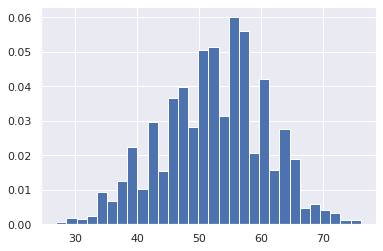

In [6]:
hist = plt.hist(NWD, bins=30, density=True)

In [7]:
Humid =df.groupby(['Humidity'])['Failure.Rate'].agg('sum')

In [8]:
FWD = []
for T in Humid.index :
    FWD.extend([T] *int(Humid[T]))
FWD = np.asarray(FWD)

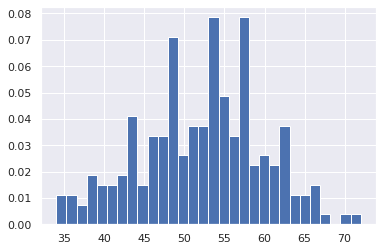

In [9]:
hist = plt.hist(FWD, bins=30, density=True)

In [10]:
x_d = np.linspace(25, 75, 2000)

/tmp/ipykernel_19294/128996880.py:5: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  Nkde.fit(NWD[:, None])


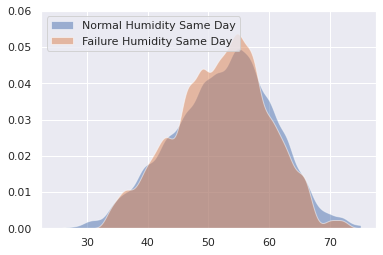

In [11]:
from sklearn.neighbors import KernelDensity

# instantiate and fit the KDE model
Nkde = KernelDensity(bandwidth=1.0, kernel='gaussian')
Nkde.fit(NWD[:, None])
# score_samples returns the log of the probability density
Nlogprob = Nkde.score_samples(x_d[:, None])

Fkde = KernelDensity(bandwidth=1.0, kernel='gaussian')
Fkde.fit(FWD[:, None])
# score_samples returns the log of the probability density
Flogprob = Fkde.score_samples(x_d[:, None])

plt.fill_between(x_d, np.exp(Nlogprob), alpha=0.5,label='Normal Humidity Same Day')
plt.fill_between(x_d, np.exp(Flogprob), alpha=0.5,label='Failure Humidity Same Day')
plt.legend(loc='upper left')

#plt.plot(NWD, np.full_like(NWD, -0.01), '|k', markeredgewidth=1)
plt.ylim(0, 0.06)
np.sum(np.abs((np.exp(Nlogprob)-np.exp(Flogprob))))*(x_d[1]-x_d[0])
H_Nlogprob.append(Nlogprob)
H_Flogprob.append(Flogprob)

/tmp/ipykernel_19294/2306158676.py:15: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  Nkde.fit(NWD[:, None])


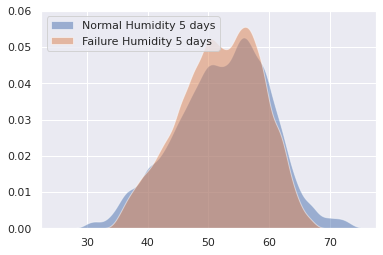

In [12]:
##############
### 2 days ###
##############
NWD=df.Humidity2.dropna()
Humid =df.groupby(['Humidity2'])['Failure.Rate'].agg('sum')
FWD = []
for T in Humid.index :
    FWD.extend([T] *int(Humid[T]))
FWD = np.asarray(FWD)
x_d = np.linspace(25, 75, 2000)
from sklearn.neighbors import KernelDensity

# instantiate and fit the KDE model
Nkde = KernelDensity(bandwidth=1.0, kernel='gaussian')
Nkde.fit(NWD[:, None])
# score_samples returns the log of the probability density
Nlogprob = Nkde.score_samples(x_d[:, None])

Fkde = KernelDensity(bandwidth=1.0, kernel='gaussian')
Fkde.fit(FWD[:, None])
# score_samples returns the log of the probability density
Flogprob = Fkde.score_samples(x_d[:, None])

plt.fill_between(x_d, np.exp(Nlogprob), alpha=0.5,label='Normal Humidity 5 days')
plt.fill_between(x_d, np.exp(Flogprob), alpha=0.5,label='Failure Humidity 5 days')
plt.legend(loc='upper left')

#plt.plot(NWD, np.full_like(NWD, -0.01), '|k', markeredgewidth=1)
plt.ylim(0, 0.06)
np.sum(np.abs((np.exp(Nlogprob)-np.exp(Flogprob))))*(x_d[1]-x_d[0])
H_Nlogprob.append(Nlogprob)
H_Flogprob.append(Flogprob)

/tmp/ipykernel_19294/3298054515.py:15: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  Nkde.fit(NWD[:, None])


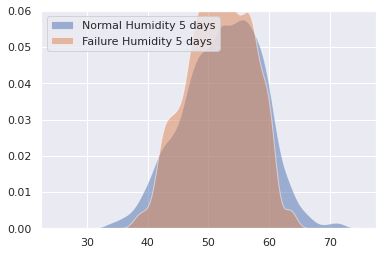

In [13]:
##############
### 5 days ###
##############
NWD=df.Humidity5.dropna()
Humid =df.groupby(['Humidity5'])['Failure.Rate'].agg('sum')
FWD = []
for T in Humid.index :
    FWD.extend([T] * int(Humid[T]))
FWD = np.asarray(FWD)
x_d = np.linspace(25, 75, 2000)
from sklearn.neighbors import KernelDensity

# instantiate and fit the KDE model
Nkde = KernelDensity(bandwidth=1.0, kernel='gaussian')
Nkde.fit(NWD[:, None])
# score_samples returns the log of the probability density
Nlogprob = Nkde.score_samples(x_d[:, None])

Fkde = KernelDensity(bandwidth=1.0, kernel='gaussian')
Fkde.fit(FWD[:, None])
# score_samples returns the log of the probability density
Flogprob = Fkde.score_samples(x_d[:, None])

plt.fill_between(x_d, np.exp(Nlogprob), alpha=0.5,label='Normal Humidity 5 days')
plt.fill_between(x_d, np.exp(Flogprob), alpha=0.5,label='Failure Humidity 5 days')
plt.legend(loc='upper left')

#plt.plot(NWD, np.full_like(NWD, -0.01), '|k', markeredgewidth=1)
plt.ylim(0, 0.06)
np.sum(np.abs((np.exp(Nlogprob)-np.exp(Flogprob))))*(x_d[1]-x_d[0])
H_Nlogprob.append(Nlogprob)
H_Flogprob.append(Flogprob)

/tmp/ipykernel_19294/4171102762.py:15: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  Nkde.fit(NWD[:, None])


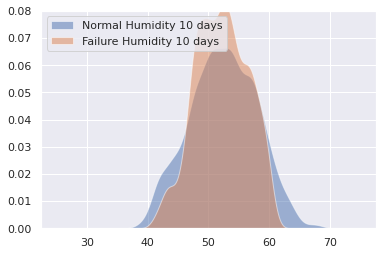

In [14]:
##############
### 10 days ###
##############
NWD=df.Humidity10.dropna()
Humid =df.groupby(['Humidity10'])['Failure.Rate'].agg('sum')
FWD = []
for T in Humid.index :
    FWD.extend([T] *int(Humid[T]))
FWD = np.asarray(FWD)
x_d = np.linspace(25, 75, 2000)
from sklearn.neighbors import KernelDensity

# instantiate and fit the KDE model
Nkde = KernelDensity(bandwidth=1.0, kernel='gaussian')
Nkde.fit(NWD[:, None])
# score_samples returns the log of the probability density
Nlogprob = Nkde.score_samples(x_d[:, None])

Fkde = KernelDensity(bandwidth=1.0, kernel='gaussian')
Fkde.fit(FWD[:, None])
# score_samples returns the log of the probability density
Flogprob = Fkde.score_samples(x_d[:, None])

plt.fill_between(x_d, np.exp(Nlogprob), alpha=0.5,label='Normal Humidity 10 days')
plt.fill_between(x_d, np.exp(Flogprob), alpha=0.5,label='Failure Humidity 10 days')
plt.legend(loc='upper left')

#plt.plot(NWD, np.full_like(NWD, -0.01), '|k', markeredgewidth=1)
plt.ylim(0, 0.08)
np.sum(np.abs((np.exp(Nlogprob)-np.exp(Flogprob))))*(x_d[1]-x_d[0])
H_Nlogprob.append(Nlogprob)
H_Flogprob.append(Flogprob)

/tmp/ipykernel_19294/3974281984.py:15: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  Nkde.fit(NWD[:, None])


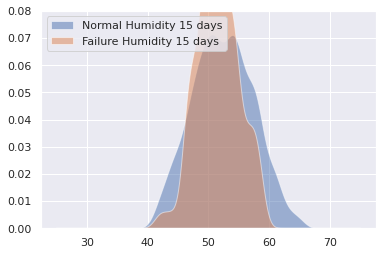

In [15]:
##############
### 15 days ###
##############
NWD=df.Humidity15.dropna()
Humid =df.groupby(['Humidity15'])['Failure.Rate'].agg('sum')
FWD = []
for T in Humid.index :
    FWD.extend([T] * int(Humid[T]))
FWD = np.asarray(FWD)
x_d = np.linspace(25, 75, 2000)
from sklearn.neighbors import KernelDensity

# instantiate and fit the KDE model
Nkde = KernelDensity(bandwidth=1.0, kernel='gaussian')
Nkde.fit(NWD[:, None])
# score_samples returns the log of the probability density
Nlogprob = Nkde.score_samples(x_d[:, None])

Fkde = KernelDensity(bandwidth=1.0, kernel='gaussian')
Fkde.fit(FWD[:, None])
# score_samples returns the log of the probability density
Flogprob = Fkde.score_samples(x_d[:, None])

plt.fill_between(x_d, np.exp(Nlogprob), alpha=0.5,label='Normal Humidity 15 days')
plt.fill_between(x_d, np.exp(Flogprob), alpha=0.5,label='Failure Humidity 15 days')
plt.legend(loc='upper left')

#plt.plot(NWD, np.full_like(NWD, -0.01), '|k', markeredgewidth=1)
plt.ylim(0, 0.08)
np.sum(np.abs((np.exp(Nlogprob)-np.exp(Flogprob))))*(x_d[1]-x_d[0])
H_Nlogprob.append(Nlogprob)
H_Flogprob.append(Flogprob)

In [16]:
x_dH = x_d

In [17]:
NWD=df.Temp

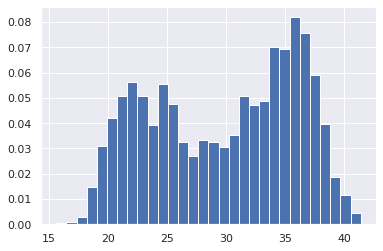

In [18]:
hist = plt.hist(NWD, bins=30, density=True)

In [19]:
Temp =df.groupby(['Temp'])['Failure.Rate'].agg('sum')

In [20]:
FWD = []
for T in Temp.index :
    FWD.extend([T] *int(Temp[T]))
FWD = np.asarray(FWD)

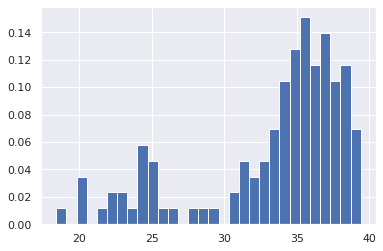

In [21]:
hist = plt.hist(FWD, bins=30, density=True)

In [22]:
x_d = np.linspace(15, 42, 2000)

/tmp/ipykernel_19294/3394191911.py:5: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  Nkde.fit(NWD[:, None])


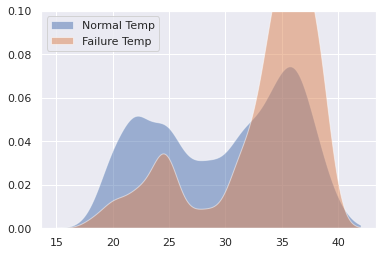

In [23]:
from sklearn.neighbors import KernelDensity

# instantiate and fit the KDE model
Nkde = KernelDensity(bandwidth=1.0, kernel='gaussian')
Nkde.fit(NWD[:, None])
# score_samples returns the log of the probability density
Nlogprob = Nkde.score_samples(x_d[:, None])

Fkde = KernelDensity(bandwidth=1.0, kernel='gaussian')
Fkde.fit(FWD[:, None])
# score_samples returns the log of the probability density
Flogprob = Fkde.score_samples(x_d[:, None])

plt.fill_between(x_d, np.exp(Nlogprob), alpha=0.5,label='Normal Temp')
plt.fill_between(x_d, np.exp(Flogprob), alpha=0.5,label='Failure Temp')
plt.legend(loc='upper left')

#plt.plot(NWD, np.full_like(NWD, -0.01), '|k', markeredgewidth=1)
plt.ylim(0, 0.1)
T_Nlogprob.append(Nlogprob)
T_Flogprob.append(Flogprob)

In [24]:
np.sum(np.abs((np.exp(Nlogprob)-np.exp(Flogprob))))*(x_d[1]-x_d[0])

0.5829999193184902

/tmp/ipykernel_19294/3005075082.py:15: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  Nkde.fit(NWD[:, None])


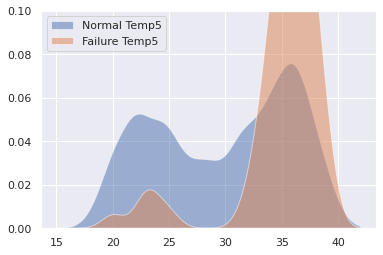

In [25]:
##############
### 2 days ###
##############
NWD=df.Temp2.dropna()
Temp =df.groupby(['Temp2'])['Failure.Rate'].agg('sum')
FWD = []
for T in Temp.index :
    FWD.extend([T] *int(Temp[T]))
FWD = np.asarray(FWD)
x_d = np.linspace(15, 42, 2000)
from sklearn.neighbors import KernelDensity

# instantiate and fit the KDE model
Nkde = KernelDensity(bandwidth=1.0, kernel='gaussian')
Nkde.fit(NWD[:, None])
# score_samples returns the log of the probability density
Nlogprob = Nkde.score_samples(x_d[:, None])

Fkde = KernelDensity(bandwidth=1.0, kernel='gaussian')
Fkde.fit(FWD[:, None])
# score_samples returns the log of the probability density
Flogprob = Fkde.score_samples(x_d[:, None])

plt.fill_between(x_d, np.exp(Nlogprob), alpha=0.5,label='Normal Temp5')
plt.fill_between(x_d, np.exp(Flogprob), alpha=0.5,label='Failure Temp5')
plt.legend(loc='upper left')

#plt.plot(NWD, np.full_like(NWD, -0.01), '|k', markeredgewidth=1)
plt.ylim(0, 0.1)
np.sum(np.abs((np.exp(Nlogprob)-np.exp(Flogprob))))*(x_d[1]-x_d[0])
T_Nlogprob.append(Nlogprob)
T_Flogprob.append(Flogprob)

/tmp/ipykernel_19294/1486081109.py:15: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  Nkde.fit(NWD[:, None])


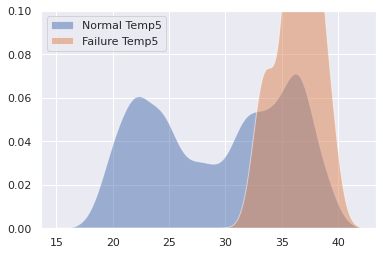

In [26]:
##############
### 5 days ###
##############
NWD=df.Temp5.dropna()
Temp =df.groupby(['Temp5'])['Failure.Rate'].agg('sum')
FWD = []
for T in Temp.index :
    FWD.extend([T] *int(Temp[T]))
FWD = np.asarray(FWD)
x_d = np.linspace(15, 42, 2000)
from sklearn.neighbors import KernelDensity

# instantiate and fit the KDE model
Nkde = KernelDensity(bandwidth=1.0, kernel='gaussian')
Nkde.fit(NWD[:, None])
# score_samples returns the log of the probability density
Nlogprob = Nkde.score_samples(x_d[:, None])

Fkde = KernelDensity(bandwidth=1.0, kernel='gaussian')
Fkde.fit(FWD[:, None])
# score_samples returns the log of the probability density
Flogprob = Fkde.score_samples(x_d[:, None])

plt.fill_between(x_d, np.exp(Nlogprob), alpha=0.5,label='Normal Temp5')
plt.fill_between(x_d, np.exp(Flogprob), alpha=0.5,label='Failure Temp5')
plt.legend(loc='upper left')

#plt.plot(NWD, np.full_like(NWD, -0.01), '|k', markeredgewidth=1)
plt.ylim(0, 0.1)
np.sum(np.abs((np.exp(Nlogprob)-np.exp(Flogprob))))*(x_d[1]-x_d[0])
T_Nlogprob.append(Nlogprob)
T_Flogprob.append(Flogprob)

/tmp/ipykernel_19294/1911399428.py:15: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  Nkde.fit(NWD[:, None])


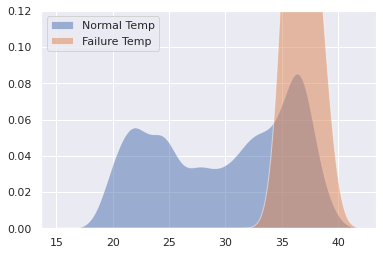

In [27]:
##############
### 10 days ###
##############
NWD=df.Temp10.dropna()
Temp =df.groupby(['Temp10'])['Failure.Rate'].agg('sum')
FWD = []
for T in Temp.index :
    FWD.extend([T] *int(Temp[T]))
FWD = np.asarray(FWD)
x_d = np.linspace(15, 42, 2000)
from sklearn.neighbors import KernelDensity

# instantiate and fit the KDE model
Nkde = KernelDensity(bandwidth=1.0, kernel='gaussian')
Nkde.fit(NWD[:, None])
# score_samples returns the log of the probability density
Nlogprob = Nkde.score_samples(x_d[:, None])

Fkde = KernelDensity(bandwidth=1.0, kernel='gaussian')
Fkde.fit(FWD[:, None])
# score_samples returns the log of the probability density
Flogprob = Fkde.score_samples(x_d[:, None])

plt.fill_between(x_d, np.exp(Nlogprob), alpha=0.5,label='Normal Temp')
plt.fill_between(x_d, np.exp(Flogprob), alpha=0.5,label='Failure Temp')
plt.legend(loc='upper left')

#plt.plot(NWD, np.full_like(NWD, -0.01), '|k', markeredgewidth=1)
plt.ylim(0, 0.12)
np.sum(np.abs((np.exp(Nlogprob)-np.exp(Flogprob))))*(x_d[1]-x_d[0])
T_Nlogprob.append(Nlogprob)
T_Flogprob.append(Flogprob)

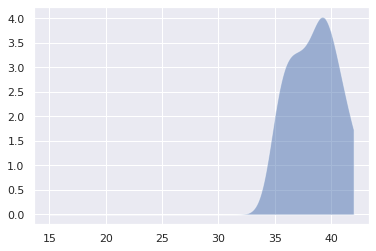

In [28]:
plt.fill_between(x_d, np.exp(Flogprob)/(np.exp(Nlogprob)), alpha=0.5,label='Failure Temprature last 10 days')

/tmp/ipykernel_19294/85390128.py:15: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  Nkde.fit(NWD[:, None])


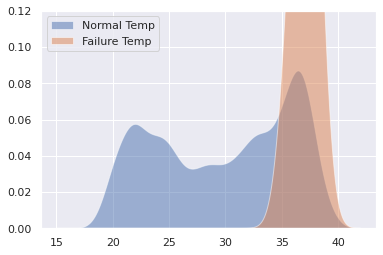

In [29]:
##############
### 15 days ###
##############
NWD=df.Temp15.dropna()
Temp =df.groupby(['Temp15'])['Failure.Rate'].agg('sum')
FWD = []
for T in Temp.index :
    FWD.extend([T] *int(Temp[T]))
FWD = np.asarray(FWD)
x_d = np.linspace(15, 42, 2000)
from sklearn.neighbors import KernelDensity

# instantiate and fit the KDE model
Nkde = KernelDensity(bandwidth=1.0, kernel='gaussian')
Nkde.fit(NWD[:, None])
# score_samples returns the log of the probability density
Nlogprob = Nkde.score_samples(x_d[:, None])

Fkde = KernelDensity(bandwidth=1.0, kernel='gaussian')
Fkde.fit(FWD[:, None])
# score_samples returns the log of the probability density
Flogprob = Fkde.score_samples(x_d[:, None])

plt.fill_between(x_d, np.exp(Nlogprob), alpha=0.5,label='Normal Temp')
plt.fill_between(x_d, np.exp(Flogprob), alpha=0.5,label='Failure Temp')
plt.legend(loc='upper left')

#plt.plot(NWD, np.full_like(NWD, -0.01), '|k', markeredgewidth=1)
plt.ylim(0, 0.12)
np.sum(np.abs((np.exp(Nlogprob)-np.exp(Flogprob))))*(x_d[1]-x_d[0])
T_Nlogprob.append(Nlogprob)
T_Flogprob.append(Flogprob)

In [30]:
x_dT = x_d

In [31]:
dfR=df[df['Rain']>0]

In [32]:
NWD=dfR.Rain

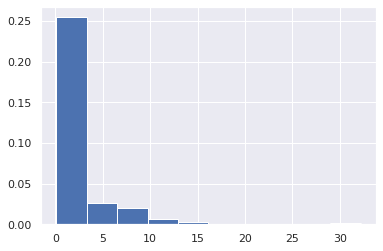

In [33]:
hist = plt.hist(NWD, density=True)

In [36]:
Rain =dfR.groupby(['Rain'])['Failure.Rate'].agg('sum')

In [37]:
FWD = []
for T in Rain.index :
    FWD.extend([T] *int(Rain[T]))
FWD = np.asarray(FWD)

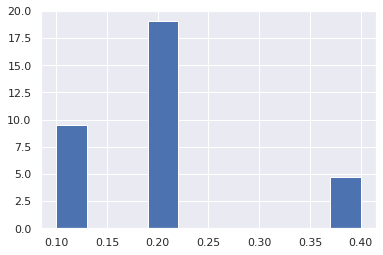

In [38]:
hist = plt.hist(FWD, density=True)

In [39]:
x_d = np.linspace(0, 40, 10000)

/tmp/ipykernel_19294/821354118.py:15: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  Nkde.fit(NWD[:, None])


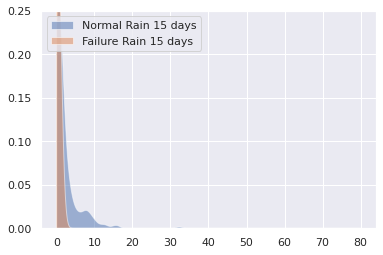

In [40]:
from sklearn.neighbors import KernelDensity

dfR=df[df['Rain']>0]
NWD=dfR.Rain.dropna()
Rain =dfR.groupby(['Rain'])['Failure.Rate'].agg('sum')
FWD = []
for T in Rain.index :
    FWD.extend([T] *int(Rain[T]))
FWD = np.asarray(FWD)
x_d = np.linspace(0, 80, 10000)
from sklearn.neighbors import KernelDensity

# instantiate and fit the KDE model
Nkde = KernelDensity(bandwidth=1.0, kernel='gaussian')
Nkde.fit(NWD[:, None])
# score_samples returns the log of the probability density
Nlogprob = Nkde.score_samples(x_d[:, None])

Fkde = KernelDensity(bandwidth=1.0, kernel='gaussian')
Fkde.fit(FWD[:, None])
# score_samples returns the log of the probability density
Flogprob = Fkde.score_samples(x_d[:, None])

plt.fill_between(x_d, np.exp(Nlogprob), alpha=0.5,label='Normal Rain 15 days')
plt.fill_between(x_d, np.exp(Flogprob), alpha=0.5,label='Failure Rain 15 days')
plt.legend(loc='upper left')

#plt.plot(NWD, np.full_like(NWD, -0.01), '|k', markeredgewidth=1)
plt.ylim(0, 0.25)
np.sum(np.abs((np.exp(Nlogprob)-np.exp(Flogprob))))*(x_d[1]-x_d[0])
R_Nlogprob.append(Nlogprob)
R_Flogprob.append(Flogprob)

/tmp/ipykernel_19294/387223319.py:16: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  Nkde.fit(NWD[:, None])


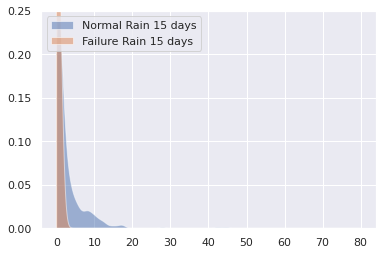

In [41]:
##############
### 2 days ###
##############
dfR=df[df['Rain2']>0]
NWD=dfR.Rain2.dropna()
Rain =dfR.groupby(['Rain2'])['Failure.Rate'].agg('sum')
FWD = []
for T in Rain.index :
    FWD.extend([T] *int(Rain[T]))
FWD = np.asarray(FWD)
x_d = np.linspace(0, 80, 10000)
from sklearn.neighbors import KernelDensity

# instantiate and fit the KDE model
Nkde = KernelDensity(bandwidth=1.0, kernel='gaussian')
Nkde.fit(NWD[:, None])
# score_samples returns the log of the probability density
Nlogprob = Nkde.score_samples(x_d[:, None])

Fkde = KernelDensity(bandwidth=1.0, kernel='gaussian')
Fkde.fit(FWD[:, None])
# score_samples returns the log of the probability density
Flogprob = Fkde.score_samples(x_d[:, None])

plt.fill_between(x_d, np.exp(Nlogprob), alpha=0.5,label='Normal Rain 15 days')
plt.fill_between(x_d, np.exp(Flogprob), alpha=0.5,label='Failure Rain 15 days')
plt.legend(loc='upper left')

#plt.plot(NWD, np.full_like(NWD, -0.01), '|k', markeredgewidth=1)
plt.ylim(0, 0.25)
np.sum(np.abs((np.exp(Nlogprob)-np.exp(Flogprob))))*(x_d[1]-x_d[0])
R_Nlogprob.append(Nlogprob)
R_Flogprob.append(Flogprob)

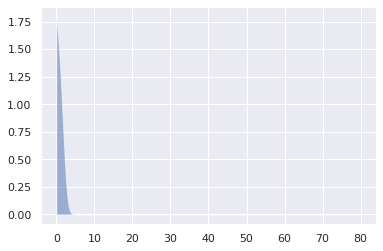

In [42]:
plt.fill_between(x_d, np.exp(Flogprob)/(np.exp(Nlogprob)), alpha=0.5,label='Failure Rain 2 days')

In [43]:
ODDS=np.exp(Flogprob)/np.exp(Nlogprob)

/tmp/ipykernel_19294/279659615.py:16: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  Nkde.fit(NWD[:, None])


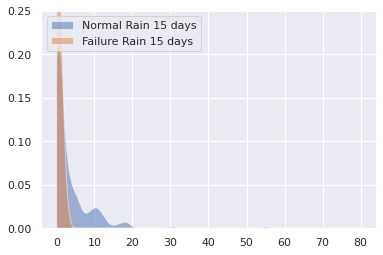

In [44]:
##############
### 5 days ###
##############
dfR=df[df['Rain5']>0]
NWD=dfR.Rain5.dropna()
Rain =dfR.groupby(['Rain5'])['Failure.Rate'].agg('sum')
FWD = []
for T in Rain.index :
    FWD.extend([T] *int(Rain[T]))
FWD = np.asarray(FWD)
x_d = np.linspace(0, 80, 10000)
from sklearn.neighbors import KernelDensity

# instantiate and fit the KDE model
Nkde = KernelDensity(bandwidth=1.0, kernel='gaussian')
Nkde.fit(NWD[:, None])
# score_samples returns the log of the probability density
Nlogprob = Nkde.score_samples(x_d[:, None])

Fkde = KernelDensity(bandwidth=1.0, kernel='gaussian')
Fkde.fit(FWD[:, None])
# score_samples returns the log of the probability density
Flogprob = Fkde.score_samples(x_d[:, None])

plt.fill_between(x_d, np.exp(Nlogprob), alpha=0.5,label='Normal Rain 15 days')
plt.fill_between(x_d, np.exp(Flogprob), alpha=0.5,label='Failure Rain 15 days')
plt.legend(loc='upper left')

#plt.plot(NWD, np.full_like(NWD, -0.01), '|k', markeredgewidth=1)
plt.ylim(0, 0.25)
np.sum(np.abs((np.exp(Nlogprob)-np.exp(Flogprob))))*(x_d[1]-x_d[0])
R_Nlogprob.append(Nlogprob)
R_Flogprob.append(Flogprob)

/tmp/ipykernel_19294/4141278103.py:16: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  Nkde.fit(NWD[:, None])


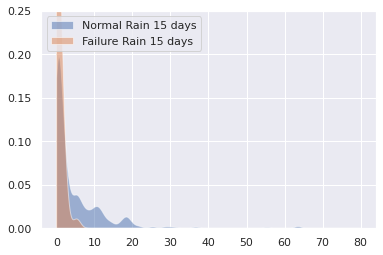

In [45]:
##############
### 10 days ###
##############
dfR=df[df['Rain10']>0]
NWD=dfR.Rain10.dropna()
Rain =dfR.groupby(['Rain10'])['Failure.Rate'].agg('sum')
FWD = []
for T in Rain.index :
    FWD.extend([T] *int(Rain[T]))
FWD = np.asarray(FWD)
x_d = np.linspace(0, 80, 10000)
from sklearn.neighbors import KernelDensity

# instantiate and fit the KDE model
Nkde = KernelDensity(bandwidth=1.0, kernel='gaussian')
Nkde.fit(NWD[:, None])
# score_samples returns the log of the probability density
Nlogprob = Nkde.score_samples(x_d[:, None])

Fkde = KernelDensity(bandwidth=1.0, kernel='gaussian')
Fkde.fit(FWD[:, None])
# score_samples returns the log of the probability density
Flogprob = Fkde.score_samples(x_d[:, None])

plt.fill_between(x_d, np.exp(Nlogprob), alpha=0.5,label='Normal Rain 15 days')
plt.fill_between(x_d, np.exp(Flogprob), alpha=0.5,label='Failure Rain 15 days')
plt.legend(loc='upper left')

#plt.plot(NWD, np.full_like(NWD, -0.01), '|k', markeredgewidth=1)
plt.ylim(0, 0.25)
np.sum(np.abs((np.exp(Nlogprob)-np.exp(Flogprob))))*(x_d[1]-x_d[0])
R_Nlogprob.append(Nlogprob)
R_Flogprob.append(Flogprob)

/tmp/ipykernel_19294/3322002987.py:16: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  Nkde.fit(NWD[:, None])


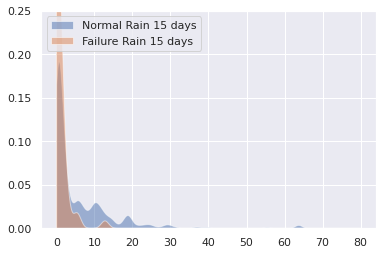

In [46]:
##############
### 15 days ###
##############
dfR=df[df['Rain15']>0]
NWD=dfR.Rain15.dropna()
Rain =dfR.groupby(['Rain15'])['Failure.Rate'].agg('sum')
FWD = []
for T in Rain.index :
    FWD.extend([T] *int(Rain[T]))
FWD = np.asarray(FWD)
x_d = np.linspace(0, 80, 10000)
from sklearn.neighbors import KernelDensity

# instantiate and fit the KDE model
Nkde = KernelDensity(bandwidth=1.0, kernel='gaussian')
Nkde.fit(NWD[:, None])
# score_samples returns the log of the probability density
Nlogprob = Nkde.score_samples(x_d[:, None])

Fkde = KernelDensity(bandwidth=1.0, kernel='gaussian')
Fkde.fit(FWD[:, None])
# score_samples returns the log of the probability density
Flogprob = Fkde.score_samples(x_d[:, None])

plt.fill_between(x_d, np.exp(Nlogprob), alpha=0.5,label='Normal Rain 15 days')
plt.fill_between(x_d, np.exp(Flogprob), alpha=0.5,label='Failure Rain 15 days')
plt.legend(loc='upper left')

#plt.plot(NWD, np.full_like(NWD, -0.01), '|k', markeredgewidth=1)
plt.ylim(0, 0.25)
np.sum(np.abs((np.exp(Nlogprob)-np.exp(Flogprob))))*(x_d[1]-x_d[0])
R_Nlogprob.append(Nlogprob)
R_Flogprob.append(Flogprob)

In [47]:
x_dR = x_d

In [48]:
x=[x_dT,x_dH,x_dR]
labels=['Temperature','Humidity','Rain']
NlogP=[T_Nlogprob,H_Nlogprob,R_Nlogprob]
FlogP=[T_Flogprob,H_Flogprob,R_Flogprob]
W_size=[1,2,5,10,15]
legend_loc=['upper left','upper left','upper right']

In [49]:
W_size[0]

1

In [50]:
NlogP[2][0]

array([   -1.4615236 ,    -1.45810021,    -1.45472888, ...,
       -1147.83168544, -1148.21402767, -1148.59643391])

/tmp/ipykernel_19294/1931126089.py:14: UserWarning: First parameter to grid() is false, but line properties are supplied. The grid will be enabled.
  axs[row, col].grid(visible=False,color='black',zorder =1,linestyle='--')


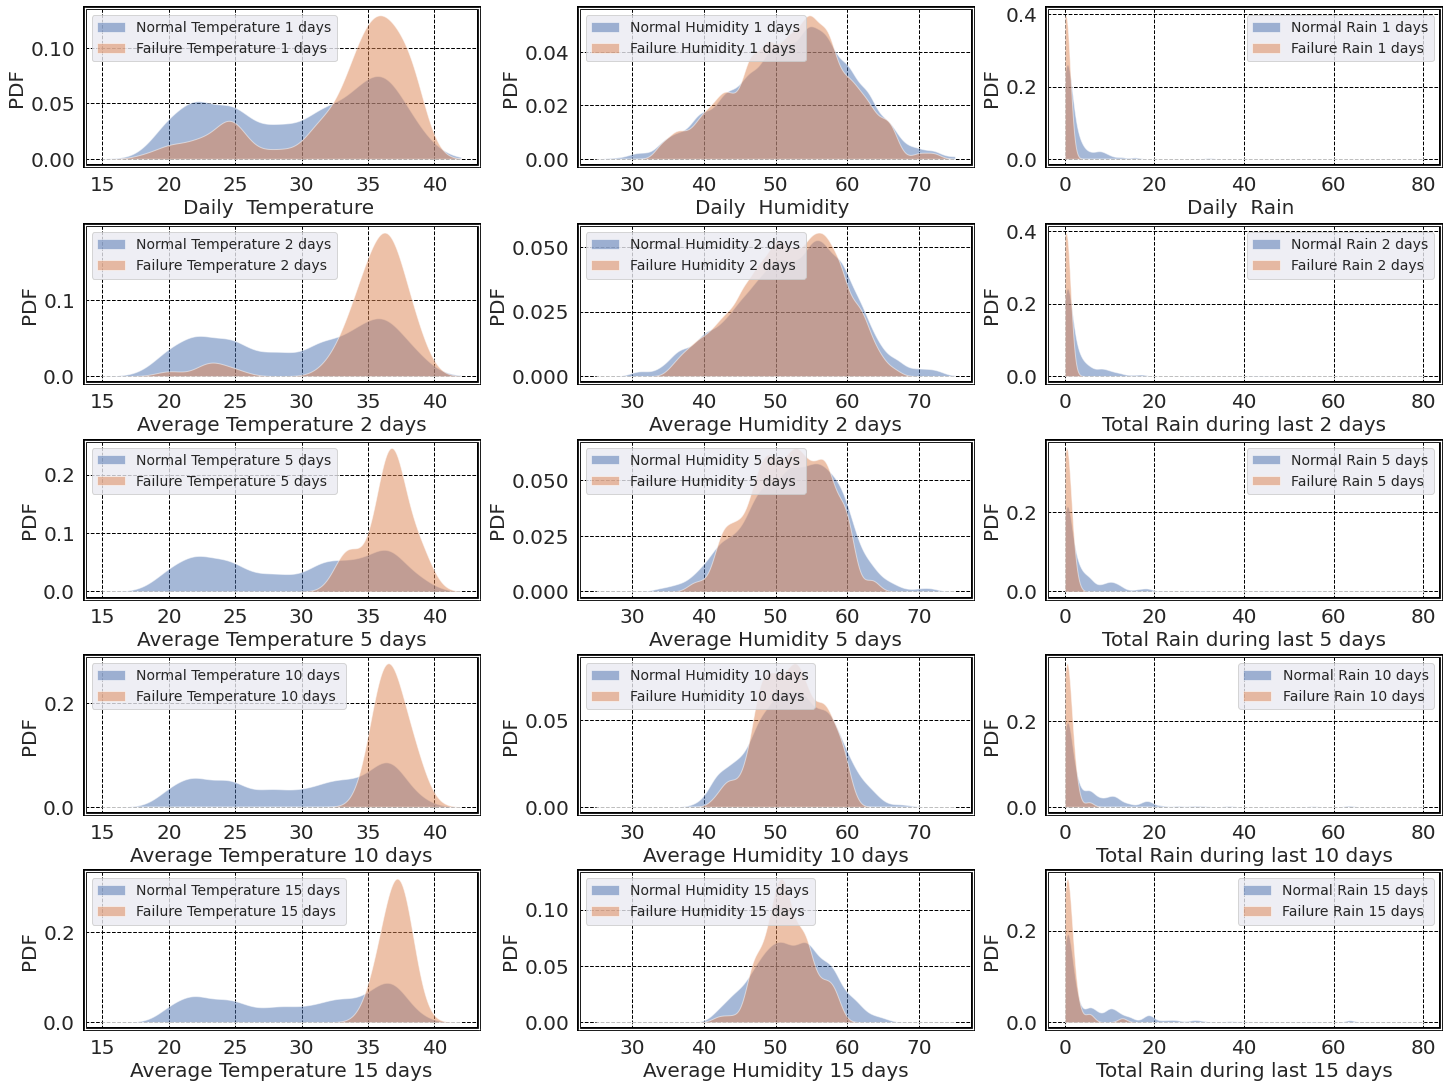

In [51]:
import matplotlib.pyplot as plt
import numpy as np

fig, axs = plt.subplots(ncols=3, nrows=5, figsize=(20, 15),
                        constrained_layout=True)
# add an artist, in this case a nice label in the middle...
for col in range(3):
    x_d = x[col]
    for row in range(5):
        axs[row, col].fill_between(x_d, np.exp(NlogP[col][row]), alpha=0.5,label='Normal {} {} days'.format(labels[col],W_size[row]))
        axs[row, col].fill_between(x_d, np.exp(FlogP[col][row]), alpha=0.5,label='Failure {} {} days'.format(labels[col],W_size[row]))
        Area=np.sum(np.abs((np.exp(NlogP[col][row])-np.exp(FlogP[col][row]))))*(x_d[1]-x_d[0])
        axs[row, col].legend(loc=legend_loc[col],prop={'size': 14})
        axs[row, col].grid(visible=False,color='black',zorder =1,linestyle='--')
        axs[row, col].set_facecolor('xkcd:white')
        axs[row, col].set_ylabel('PDF',fontsize=20)
        if(row==0):
            axs[row, col].set_xlabel('Daily  {} '.format(labels[col]),fontsize=20)
            axs[row, col].tick_params(labelsize=20)
            axs[row, col].patch.set_edgecolor('black')
            axs[row, col].patch.set_linewidth('4') 
            continue
        if(col==2):
            axs[row, col].set_xlabel('Total {} during last {} days'.format(labels[col],W_size[row]),fontsize=20)
        else:
            axs[row, col].set_xlabel('Average {} {} days'.format(labels[col],W_size[row]),fontsize=20)
        axs[row, col].tick_params(labelsize=20)
        axs[row, col].patch.set_edgecolor('black')
        axs[row, col].patch.set_linewidth('4') 

#fig.suptitle('Features Impact on Joints')

In [52]:
x=[x_dT,x_dH,x_dR]
labels=['Temperature','Humidity','Rain']
units=[" (°C)"," (RH)"," (mm)"]
NlogP=[T_Nlogprob,H_Nlogprob,R_Nlogprob]
FlogP=[T_Flogprob,H_Flogprob,R_Flogprob]
W_size=[1,2,5,10,15]

In [53]:
label='Normal {} {} days'.format(labels[0],W_size[3])

In [54]:
label

'Normal Temperature 10 days'

In [ ]:
axs[0, 0]

In [ ]:
x[2][:-3000]

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

fig, axs = plt.subplots(ncols=1, nrows=3, figsize=(10, 8),
                        constrained_layout=True)
# add an artist, in this case a nice label in the middle...
x_d = x[0]    
axs[0].plot(x_d, np.exp(FlogP[0][3])/np.exp(NlogP[0][3]),linewidth=5, color='blue')
Area=np.sum(np.abs((np.exp(NlogP[0][0])-np.exp(FlogP[0][3]))))*(x_d[1]-x_d[0])
#axs[0].legend(loc='upper left',prop={'size': 14})
axs[0].grid(visible=False,color='black',zorder =1,linestyle='--')
axs[0].set_facecolor('xkcd:white')
axs[0].set_ylabel('Failure Odds',fontsize=24)
axs[0].set_xlabel('Average {}{} for the last {} days'.format(labels[0],units[0],W_size[3]),fontsize=24)
axs[0].tick_params(labelsize=24)
axs[0].patch.set_edgecolor('black')
axs[0].patch.set_linewidth('4') 
axs[0].yaxis.set_ticks(np.arange(0, 4, 1))
x_d = x[1]    
axs[1].plot(x_d[:-500], np.exp(FlogP[1][4][:-500])/np.exp(NlogP[1][4][:-500]),linewidth=5,color='blue')
Area=np.sum(np.abs((np.exp(NlogP[1][4])-np.exp(FlogP[1][4]))))*(x_d[1]-x_d[0])
#axs[1].legend(loc='upper right',prop={'size': 14})
axs[1].grid(visible=False,color='black',zorder =1,linestyle='--')
axs[1].set_facecolor('xkcd:white')
axs[1].set_ylabel('Failure Odds',fontsize=24)
axs[1].set_xlabel('Average {}{} for the last {} days'.format(labels[1],units[1],W_size[4]),fontsize=24)
axs[1].tick_params(labelsize=24)
axs[1].patch.set_edgecolor('black')
axs[1].patch.set_linewidth('4')  
axs[1].yaxis.set_ticks(np.arange(0, 4, 1))
x_d = x[2]    
axs[2].plot(x_d[:-3000], np.exp(FlogP[2][1][:-3000])/np.exp(NlogP[2][1][:-3000]),linewidth=5,color='blue')
Area=np.sum(np.abs((np.exp(NlogP[2][1])-np.exp(FlogP[2][1]))))*(x_d[1]-x_d[0])
#axs[2].legend(loc='upper left',prop={'size': 14})
axs[2].grid(visible=False,color='black',zorder =1,linestyle='--')
axs[2].set_facecolor('xkcd:white')
axs[2].set_ylabel('Failure Odds',fontsize=24)
axs[2].set_xlabel('Total {}{} during the last {} days'.format(labels[2],units[2],W_size[1]),fontsize=24)
axs[2].tick_params(labelsize=24)
axs[2].patch.set_edgecolor('black')
axs[2].patch.set_linewidth('4')  
#fig.suptitle('The Odds of Failures')